# Quantum system defined by Prof. Liu

## Unperturbed 2-d quantum harmonic oscillator
$$
\hat{H}=-\frac{1}{2 m}\left(\mathrm d^{2} / \mathrm d x^{2}+\mathrm d^{2} / \mathrm d y^{2}\right)+\frac{1}{2} m \omega(x^{2}+y^{2})
$$

In [1]:
using Pkg
Pkg.add("Arpack")
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


### Define the operators

In [2]:
using SparseArrays
using Arpack
using LinearAlgebra
BLAS.set_num_threads(4)

function ∇²(grid::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64})
    # Initialize sparse matrices for second derivative in x and y directions
    N = length(grid)
    h = grid[2] - grid[1]
    dx2 = spdiagm(0 => -2 * ones(N), 1 => ones(N-1), -1 => ones(N-1)) / h^2
    dy2 = copy(dx2)

    # Adjust the elements for the periodic boundary conditions
    dx2[1, end] = 1 / h^2
    dx2[end, 1] = 1 / h^2
    dy2[1, end] = 1 / h^2
    dy2[end, 1] = 1 / h^2

    # Form 2D Laplacian by taking the Kronecker sum of dx2 and dy2
    id_N = sparse(I, N, N)
    L = kron(id_N, dx2) + kron(dy2, id_N)
end

function V(m::Float64, ω::Float64, σ::Float64, xx::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64})
    V_vec = vec([.5 * m * ω * (x.^2 + y.^2) + σ * (x-y).^4 for x in xx, y in xx])
    V_matrix = Diagonal(V_vec)
end


V (generic function with 1 method)

### Calculate the eigen energies

In [3]:
# using DelimitedFiles
N = 201         # Number of grid points in each direction
m = 1.          # Mass
ω = 1.
σ = 0.
xx = range(-8, 8, length=N)
H = -.5 * m * ω * ∇²(xx) + V(m, ω, σ, xx)
λ, ϕ = eigs(H, nev=20, which=:SR);
# writedlm("Julia_unperturbed.csv",λ)

### Visualization

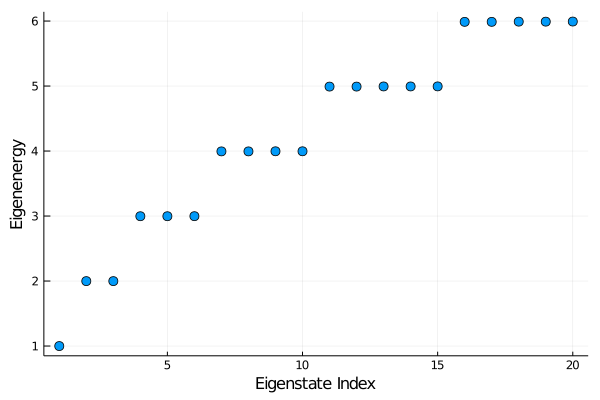

In [4]:
using Plots
scatter(1:length(λ),λ, markersize=5, legend=false)
xlabel!("Eigenstate Index")
ylabel!("Eigenenergy")

## Perturbed 2-d quantum harmonic oscillator

$$
\hat{H} = -\frac{1}{2 m}\left(\mathrm d^{2} / \mathrm d x^{2}+\mathrm d^{2} / \mathrm d y^{2}\right)+\frac{1}{2} m \omega\left(x^{2}+y^{2}\right)+\sigma(x-y)^{4}
$$

### Define the operators

In [5]:
function ∇²(grid::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64})
    # Initialize sparse matrices for second derivative in x and y directions
    N = length(grid)
    h = grid[2] - grid[1]
    dx2 = spdiagm(0 => -2 * ones(N), 1 => ones(N-1), -1 => ones(N-1)) / h^2
    dy2 = copy(dx2)

    # Adjust the elements for the periodic boundary conditions
    dx2[1, end] = 1 / h^2
    dx2[end, 1] = 1 / h^2
    dy2[1, end] = 1 / h^2
    dy2[end, 1] = 1 / h^2

    # Form 2D Laplacian by taking the Kronecker sum of dx2 and dy2
    id_N = sparse(I, N, N)
    L = kron(id_N, dx2) + kron(dy2, id_N)
end

function V(m::Float64, ω::Float64, σ::Float64, xx::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64})
    V_vec = vec([.5 * m * ω * (x.^2 + y.^2) + σ * (x-y).^4 for x in xx, y in xx])
    V_matrix = Diagonal(V_vec)
end

V (generic function with 1 method)

In [6]:
σ = 0.01
H̃= -.5 * m * ω * ∇²(xx) + V(m, ω, σ, xx)
λ̃,ϕ̃ = eigs(H̃, nev=20, which=:SR);
# writedlm("Julia_perturbed.csv",λ̃);

### Visualization

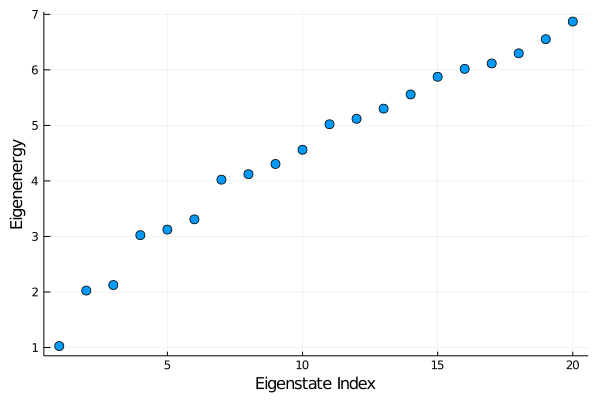

In [7]:
using Plots
scatter(1:length(λ̃),λ̃, markersize=5, legend=false)
xlabel!("Eigenstate Index")
ylabel!("Eigenenergy")